In [16]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

non-cat


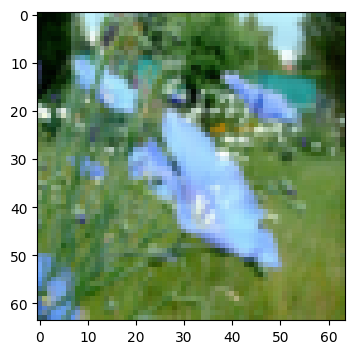

In [3]:
index = 20

plt.imshow(train_x_orig[index])

print(classes[train_y[0,index]].decode("utf-8"))

In [4]:
#flatten

train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0],-1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T
train_x_flatten.shape

(12288, 209)

In [5]:
train_x = train_x_flatten/255
test_x = test_x_flatten/255

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


In [6]:
#2 layer neural network

n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 0.0075

In [12]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False):
    
    n_x, n_h, n_y = layers_dims
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    W1= parameters["W1"]
    b1= parameters["b1"]
    W2= parameters["W2"]
    b2= parameters["b2"]
    
    for i in range(num_iterations):
    
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
    
        cost = compute_cost(A2, Y)
        
        if i%100 == 0:
            costs.append(cost)
            
            if print_cost:
                print(f'cost after {i} iterations = {cost}')

    
        dAL = -(np.divide(Y,A2) - np.divide(1-Y, 1-A2))
        dA1, dW2, db2 = linear_activation_backward(dAL, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        W1-=learning_rate*dW1
        b1-=learning_rate*db1
        W2-=learning_rate*dW2
        b2-=learning_rate*db2
        
        parameters = {
            "W1":W1,
            "b1":b1,
            "W2":W2,
            "b2":b2
        }
        
    return parameters, costs
        
def plot_costs(costs, learning_rate=0.0075):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()    
    

In [17]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2, print_cost=False)

print("Cost after first iteration: " + str(costs[0]))

two_layer_model_test(two_layer_model)

Cost after first iteration: 0.693049735659989


NameError: name 'two_layer_model_test' is not defined

cost after 0 iterations = 0.693049735659989
cost after 100 iterations = 0.6464320953428849
cost after 200 iterations = 0.6325140647912678
cost after 300 iterations = 0.6015024920354665
cost after 400 iterations = 0.5601966311605748
cost after 500 iterations = 0.5158304772764731
cost after 600 iterations = 0.47549013139433266
cost after 700 iterations = 0.43391631512257495
cost after 800 iterations = 0.40079775362038833
cost after 900 iterations = 0.3580705011323798
cost after 1000 iterations = 0.33942815383664127
cost after 1100 iterations = 0.30527536361962665
cost after 1200 iterations = 0.2749137728213017
cost after 1300 iterations = 0.24681768210614843
cost after 1400 iterations = 0.1985073503746611
cost after 1500 iterations = 0.17448318112556652
cost after 1600 iterations = 0.17080762978097747
cost after 1700 iterations = 0.11306524562164694
cost after 1800 iterations = 0.09629426845937154
cost after 1900 iterations = 0.08342617959726872
cost after 2000 iterations = 0.07439078704

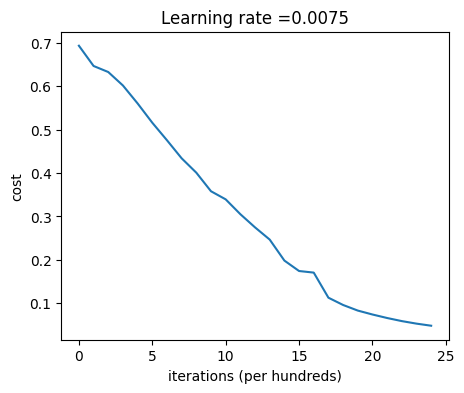

In [18]:
parameters, costs = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)
plot_costs(costs, learning_rate)

In [19]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [20]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [ ]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [29]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(num_iterations):
        
        AL, caches = L_model_forward(X, parameters)
        
        cost = compute_cost(AL, Y)
        
        grads = L_model_backward(AL, Y, caches)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i%100 == 0:
            costs.append(cost)
            if print_cost:
                print(f'cost after {i} iterations = {cost}')
                
    return parameters, costs

In [25]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

L_layer_model_test(L_layer_model)

0
Cost after first iteration: 0.6950464961800915


NameError: name 'L_layer_model_test' is not defined

In [30]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

cost after 0 iterations = 0.6950464961800915
cost after 100 iterations = 0.5892596054583805
cost after 200 iterations = 0.5232609173622991
cost after 300 iterations = 0.4497686396221906
cost after 400 iterations = 0.42090021618838985
cost after 500 iterations = 0.37246403061745953
cost after 600 iterations = 0.34742051870201907
cost after 700 iterations = 0.31719191987370265
cost after 800 iterations = 0.2664377434774658
cost after 900 iterations = 0.21991432807842565
cost after 1000 iterations = 0.14357898893623777
cost after 1100 iterations = 0.45309212623221157
cost after 1200 iterations = 0.09499357670093511
cost after 1300 iterations = 0.08014128076781371
cost after 1400 iterations = 0.06940234005536465
cost after 1500 iterations = 0.060216640231745944
cost after 1600 iterations = 0.053274157580018806
cost after 1700 iterations = 0.047629032620984335
cost after 1800 iterations = 0.0429758887943687
cost after 1900 iterations = 0.039036074365138215
cost after 2000 iterations = 0.035

In [31]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [32]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.74
